# TD - Clustering

Ce répertoire contient les fichiers et solutions pour le TD Clustering.

**Fait par : CHICA Miller et TORRES Jonathan**

## 1. Clustering k-means

### Exercice 1

In [5]:
from typing import List, Optional
import math, random
from copy import deepcopy

# Définition d'un type pour représenter un point (liste de coordonnées numériques)
Point = List[float]

# Fonction pour calculer la distance euclidienne au carré entre deux points
def euclidean_sq(p: Point, q: Point) -> float:
    return sum((pi - qi) ** 2 for pi, qi in zip(p, q))

# Fonction pour calculer le centre (moyenne) d’un ensemble de points
def mean_point(points: List[Point]) -> Point:
    dim = len(points[0])
    return [sum(p[d] for p in points) / len(points) for d in range(dim)]

# Implémentation de l’algorithme k-means
def kmeans(
    data: List[Point],            # Jeu de données : liste de points
    k: int,                       # Nombre de clusters
    init_centroids: Optional[List[Point]] = None,  # Centroïdes initiaux (optionnel)
    max_iter: int = 100,          # Nombre maximal d’itérations
    tol: float = 0.0,             # Tolérance sur le déplacement des centroïdes
    seed: Optional[int] = None,   # Graine aléatoire (pour la reproductibilité)
    verbose: bool = True          # Si True, affiche les itérations
) -> float:
    # Vérifie que le jeu de données n’est pas vide
    if not data:
        if verbose:
            print("Fin clustering, erreur = 0.0")
        return 0.0

    n = len(data)
    if k <= 0 or k > n:
        raise ValueError("k doit être compris entre 1 et len(data)")

    # Vérifie que tous les points ont la même dimension
    dim = len(data[0])
    for p in data:
        if len(p) != dim:
            raise ValueError("Tous les points doivent avoir la même dimension")

    # Initialisation aléatoire des centroïdes si aucun n’est fourni
    rng = random.Random(seed)
    if init_centroids is None:
        centroids = [deepcopy(p) for p in rng.sample(data, k)]
    else:
        if len(init_centroids) != k:
            raise ValueError("init_centroids doit contenir exactement k centroïdes")
        centroids = [list(map(float, c)) for c in init_centroids]

    # Tableau pour mémoriser les affectations (cluster de chaque point)
    assignments = [-1] * n

    # Boucle principale : assignation et mise à jour
    for it in range(1, max_iter + 1):
        changed = False
        clusters = [[] for _ in range(k)]

        # Étape d’assignation : chaque point est affecté au centroïde le plus proche
        for i, p in enumerate(data):
            dists = [euclidean_sq(p, c) for c in centroids]
            j = min(range(k), key=lambda idx: dists[idx])
            if assignments[i] != j:
                changed = True
                assignments[i] = j
            clusters[j].append(p)

        # Affichage de l’état actuel (si verbose=True)
        if verbose:
            print(f"Iteration {it}")
            for j in range(k):
                c_str = "[" + ", ".join(f"{x:.10g}" for x in centroids[j]) + "]"
                print(f"Centroid {c_str} Points {clusters[j]}")

        # Étape de mise à jour : recalcul des centroïdes comme moyennes des clusters
        new_centroids = deepcopy(centroids)
        for j in range(k):
            if clusters[j]:
                new_centroids[j] = mean_point(clusters[j])
            else:
                # Si un cluster est vide, on conserve l’ancien centroïde
                new_centroids[j] = centroids[j]

        # Calcul du déplacement maximal des centroïdes
        max_move = max(
            math.sqrt(euclidean_sq(old, new))
            for old, new in zip(centroids, new_centroids)
        )
        centroids = new_centroids

        # Condition d’arrêt : aucune affectation ne change ou déplacement < tol
        if not changed or max_move <= tol:
            break

    # Calcul de l’erreur finale (SSE : somme des distances au carré)
    sse = 0.0
    for p, j in zip(data, assignments):
        sse += euclidean_sq(p, centroids[j])

    # Affichage du résultat final
    if verbose:
        print(f"Fin clustering, erreur = {sse}")
    return sse



In [6]:
# === Tests avec le jeu de données de l’énoncé ===
data1 = [[1], [2], [18], [20], [31]]

print("=== Init [[1],[2],[18]] ===")
kmeans(data1, k=3, init_centroids=[[1], [2], [18]], tol=0.0, verbose=True)

print("\n=== Init [[18],[20],[31]] ===")
kmeans(data1, k=3, init_centroids=[[18], [20], [31]], tol=0.0, verbose=True)

=== Init [[1],[2],[18]] ===
Iteration 1
Centroid [1] Points [[1]]
Centroid [2] Points [[2]]
Centroid [18] Points [[18], [20], [31]]
Iteration 2
Centroid [1] Points [[1]]
Centroid [2] Points [[2]]
Centroid [23] Points [[18], [20], [31]]
Fin clustering, erreur = 98.0

=== Init [[18],[20],[31]] ===
Iteration 1
Centroid [18] Points [[1], [2], [18]]
Centroid [20] Points [[20]]
Centroid [31] Points [[31]]
Iteration 2
Centroid [7] Points [[1], [2]]
Centroid [20] Points [[18], [20]]
Centroid [31] Points [[31]]
Iteration 3
Centroid [1.5] Points [[1], [2]]
Centroid [19] Points [[18], [20]]
Centroid [31] Points [[31]]
Fin clustering, erreur = 2.5


2.5

### Exercice 2

In [7]:
# Jeu de données 1D pour le test (Exercice 2)
data2 = [[2], [4], [6], [12], [24], [30]]

print("=== (a) Centroides initiaux [[2], [6]] ===")
sse_a = kmeans(data2, k=2, init_centroids=[[2], [6]], tol=0.0, verbose=True)

print("\n=== (b) Centroides initiaux [[12], [24]] ===")
sse_b = kmeans(data2, k=2, init_centroids=[[12], [24]], tol=0.0, verbose=True)

# Affichage des erreurs finales pour le compte rendu
print("\n--- Récapitulatif ---")
print(f"SSE (a) init [[2],[6]]  = {sse_a}")
print(f"SSE (b) init [[12],[24]] = {sse_b}")

=== (a) Centroides initiaux [[2], [6]] ===
Iteration 1
Centroid [2] Points [[2], [4]]
Centroid [6] Points [[6], [12], [24], [30]]
Iteration 2
Centroid [3] Points [[2], [4], [6]]
Centroid [18] Points [[12], [24], [30]]
Iteration 3
Centroid [4] Points [[2], [4], [6], [12]]
Centroid [22] Points [[24], [30]]
Iteration 4
Centroid [6] Points [[2], [4], [6], [12]]
Centroid [27] Points [[24], [30]]
Fin clustering, erreur = 74.0

=== (b) Centroides initiaux [[12], [24]] ===
Iteration 1
Centroid [12] Points [[2], [4], [6], [12]]
Centroid [24] Points [[24], [30]]
Iteration 2
Centroid [6] Points [[2], [4], [6], [12]]
Centroid [27] Points [[24], [30]]
Fin clustering, erreur = 74.0

--- Récapitulatif ---
SSE (a) init [[2],[6]]  = 74.0
SSE (b) init [[12],[24]] = 74.0


---
Pour le jeu de données 1D **[[2], [4], [6], [12], [24], [30]]**, deux configurations de centroïdes initiaux ont été testées :

* (a) **[[2], [6]]**

* (b) **[[12], [24]]**

Dans les deux cas, l’algorithme converge vers le même résultat :
les points **[2], [4], [6], [12]** forment le premier cluster (centre ≈ 6),
les points **[24], [30]** le second **(centre ≈ 27)**,
avec une SSE = **74.0**.

Les deux initialisations donnent donc la même qualité de clustering,
mais la configuration (b) converge plus rapidement car ses centroïdes initiaux sont plus proches de la solution optimale.

---

### Exercice 3

In [1]:
from typing import List, Optional, Tuple, Dict
import math, random
from copy import deepcopy
import matplotlib.pyplot as plt

# =============================
#   1) K-means avec "history"
# =============================

Point = List[float]

def euclidean_sq(p: Point, q: Point) -> float:
    """Distance euclidienne au carré (pas de racine, plus rapide et suffisant pour argmin / SSE)."""
    return sum((pi - qi) ** 2 for pi, qi in zip(p, q))

def mean_point(points: List[Point]) -> Point:
    """Moyenne composante par composante."""
    dim = len(points[0])
    return [sum(p[d] for p in points) / len(points) for d in range(dim)]

def kmeans_with_history(
    data: List[Point],
    k: int,
    init_centroids: Optional[List[Point]] = None,
    max_iter: int = 100,
    tol: float = 0.0,
    seed: Optional[int] = None,
    verbose: bool = True
) -> Tuple[float, List[Dict]]:
    """
    K-means (points R^d) + enregistrement de l'historique.
    Retourne (SSE finale, history), où history est une liste d'états par itération :
      {"centroids": [[...], ...], "clusters": List[List[Point]], "assignments": List[int]}
    """
    if not data:
        if verbose:
            print("Fin clustering, erreur = 0.0")
        return 0.0, []

    n = len(data)
    if k <= 0 or k > n:
        raise ValueError("k doit être compris entre 1 et len(data)")

    dim = len(data[0])
    for p in data:
        if len(p) != dim:
            raise ValueError("Tous les points doivent avoir la même dimension")

    rng = random.Random(seed)
    if init_centroids is None:
        centroids = [deepcopy(p) for p in rng.sample(data, k)]
    else:
        if len(init_centroids) != k:
            raise ValueError("init_centroids doit contenir exactement k centroïdes")
        centroids = [list(map(float, c)) for c in init_centroids]

    assignments = [-1] * n
    history = []

    for it in range(1, max_iter + 1):
        changed = False
        clusters = [[] for _ in range(k)]

        # Étape d’assignation
        for i, p in enumerate(data):
            dists = [euclidean_sq(p, c) for c in centroids]
            j = min(range(k), key=lambda idx: dists[idx])
            if assignments[i] != j:
                changed = True
                assignments[i] = j
            clusters[j].append(p)

        # Sauvegarde de l'état courant
        history.append({
            "centroids": deepcopy(centroids),
            "clusters": deepcopy(clusters),
            "assignments": assignments[:],
        })

        # Affichage (comme dans l’énoncé)
        if verbose:
            print(f"Iteration {it}")
            for j in range(k):
                c_str = "[" + ", ".join(f"{x:.10g}" for x in centroids[j]) + "]"
                print(f"Centroid {c_str} Points {clusters[j]}")

        # Étape de mise à jour
        new_centroids = deepcopy(centroids)
        for j in range(k):
            if clusters[j]:
                new_centroids[j] = mean_point(clusters[j])
            else:
                new_centroids[j] = centroids[j]

        # Critère d’arrêt
        max_move = max(
            math.sqrt(euclidean_sq(old, new))
            for old, new in zip(centroids, new_centroids)
        )
        centroids = new_centroids
        if not changed or max_move <= tol:
            break

    # SSE finale
    sse = 0.0
    for p, j in zip(data, assignments):
        sse += euclidean_sq(p, centroids[j])

    if verbose:
        print(f"Fin clustering, erreur = {sse}")

    return sse, history


# ======================================
#   2) Visualisation 2D par itérations
# ======================================

def plot_sequence_2d(
    data: List[Point],
    names: List[str],
    history: List[Dict],
    title_prefix: str = "",
    xlim: Tuple[float, float] = (-3, 3),
    ylim: Tuple[float, float] = (-3, 3),
    show_axes_zero: bool = True
):
    """
    Génére une figure par itération :
    - Points (•) en 2D, étiquetés avec leurs noms.
    - Centroïdes (×) avec la même couleur que leurs clusters.
    - Même cluster => même couleur.
    """
    # Palette simple (bleu, rouge, vert, violet, orange, etc.)
    palette = ["tab:blue", "tab:red", "tab:green", "tab:purple", "tab:orange", "tab:brown"]

    for t, state in enumerate(history, start=1):
        centroids = state["centroids"]
        assignments = state["assignments"]
        k = len(centroids)

        plt.figure(figsize=(4.5, 4.5))

        # Axes + croix à (0,0) pour rappeler l’origine (comme l’illustration du sujet)
        if show_axes_zero:
            plt.axhline(0, linewidth=1, color="#87CEFA")
            plt.axvline(0, linewidth=1, color="#87CEFA")

        # Tracer les points par cluster
        for j in range(k):
            color = palette[j % len(palette)]
            # Points appartenant au cluster j
            xs = [p[0] for p, a in zip(data, assignments) if a == j]
            ys = [p[1] for p, a in zip(data, assignments) if a == j]
            labels = [nm for nm, a in zip(names, assignments) if a == j]

            plt.scatter(xs, ys, s=45, color=color)  # points (•)
            # Annotation des points
            for x, y, lab in zip(xs, ys, labels):
                plt.text(x + 0.05, y + 0.05, lab, fontsize=10, color=color)

            # Centroïde du cluster j (×)
            cx, cy = centroids[j]
            plt.scatter([cx], [cy], marker="x", s=100, linewidths=2.0, color=color)

        plt.xlim(*xlim)
        plt.ylim(*ylim)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(f"{title_prefix} - Iteration {t}")
        plt.tight_layout()
        # Pour enregistrer :
        # plt.savefig(f"{title_prefix.replace(' ', '_').lower()}_{t:02d}.png", dpi=150)
        plt.show()






=== Cas A : init M1 et M2 ===
Iteration 1
Centroid [-2, 3] Points [[-2, 3]]
Centroid [-2, 1] Points [[-2, 1], [-2, -1], [2, -1], [2, 1], [1, 0]]
Iteration 2
Centroid [-2, 3] Points [[-2, 3], [-2, 1]]
Centroid [0.2, 0] Points [[-2, -1], [2, -1], [2, 1], [1, 0]]
Iteration 3
Centroid [-2, 2] Points [[-2, 3], [-2, 1]]
Centroid [0.75, -0.25] Points [[-2, -1], [2, -1], [2, 1], [1, 0]]
Fin clustering, erreur = 15.5


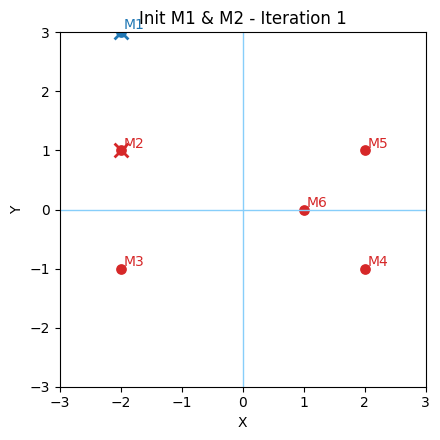

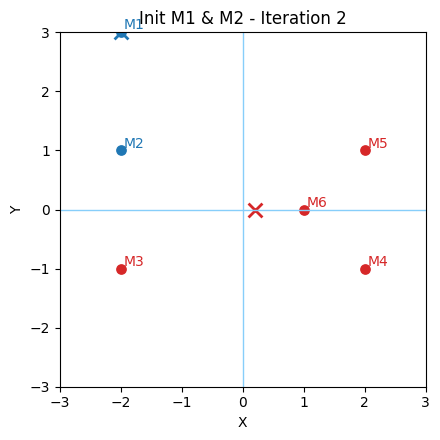

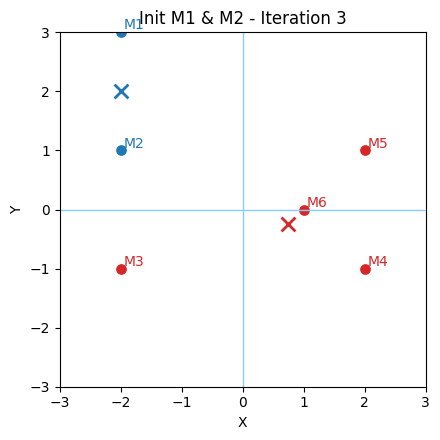


=== Cas B : init M4 et M6 ===
Iteration 1
Centroid [2, -1] Points [[2, -1]]
Centroid [1, 0] Points [[-2, 3], [-2, 1], [-2, -1], [2, 1], [1, 0]]
Iteration 2
Centroid [2, -1] Points [[2, -1], [2, 1], [1, 0]]
Centroid [-0.6, 0.8] Points [[-2, 3], [-2, 1], [-2, -1]]
Iteration 3
Centroid [1.666666667, 0] Points [[2, -1], [2, 1], [1, 0]]
Centroid [-2, 1] Points [[-2, 3], [-2, 1], [-2, -1]]
Fin clustering, erreur = 10.666666666666666


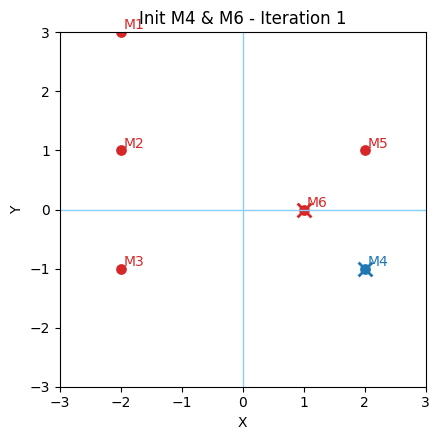

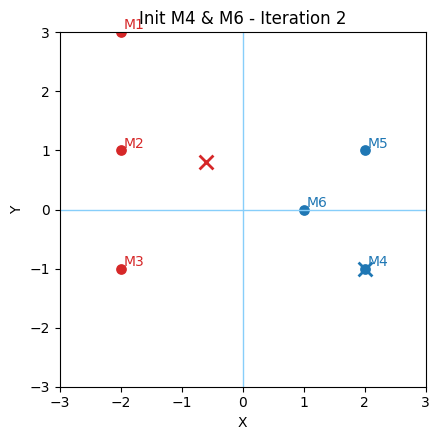

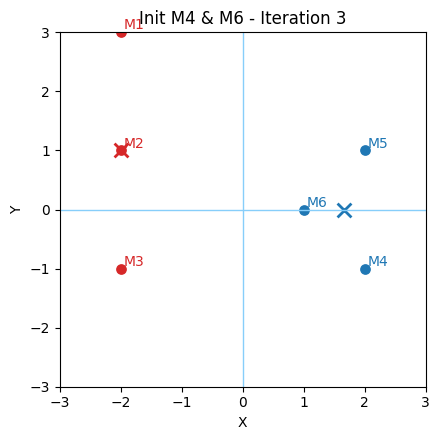


SSE A (M1,M2): 15.5
SSE B (M4,M6): 10.666666666666666


In [ ]:

# ===========================
#   3) Données + Lancements
# ===========================

# Jeu de données 2D (dans l'ordre M1..M6)
names = ["M1", "M2", "M3", "M4", "M5", "M6"]
data2d = [
    [-2,  3],  # M1
    [-2,  1],  # M2
    [-2, -1],  # M3
    [ 2, -1],  # M4
    [ 2,  1],  # M5
    [ 1,  0],  # M6
]

# (A) Centroides initiaux : M1 et M2
init_A = [data2d[0], data2d[1]]  # M1, M2
print("=== Cas A : init M1 et M2 ===")
sse_A, hist_A = kmeans_with_history(data2d, k=2, init_centroids=init_A, tol=0.0, verbose=True)
plot_sequence_2d(data2d, names, hist_A, title_prefix="Init M1 & M2", xlim=(-3,3), ylim=(-3,3))

# (B) Centroides initiaux : M4 et M6
init_B = [data2d[3], data2d[5]]  # M4, M6
print("\n=== Cas B : init M4 et M6 ===")
sse_B, hist_B = kmeans_with_history(data2d, k=2, init_centroids=init_B, tol=0.0, verbose=True)
plot_sequence_2d(data2d, names, hist_B, title_prefix="Init M4 & M6", xlim=(-3,3), ylim=(-3,3))

print("\nSSE A (M1,M2):", sse_A)
print("SSE B (M4,M6):", sse_B)


### Exercice 4

## 2. Clustering hiérarchique

# 3. Etude de cas